<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [213]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [214]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Rename filenames

In [215]:
# In BBC dataset, some filenames have the same name, for example 001.txt, so it's necessary to rename
def rename_filenames(df):
  for index, row in df.iterrows():
      df.at[index, 'filename'] = f"{index}.txt"
  return df

df = rename_filenames(df)

## Create dataset with less samples

In [216]:
import random

# def create_balanced_small_df(df, genres, num):
#   small_df_list = []
#   for genre in genres:
#     sample_rows = df.sample(num)
#     small_df_list.append(sample_rows)
#   return pd.concat(small_df_list).reset_index(drop=True)

def create_imbalanced_small_df(df, genres, max_value):
  small_df_list = []
  for genre in genres:
    qtd = random.randint(1, max_value)
    # print(qtd)
    sample_rows = df[df['genre'] == genre].sample(qtd)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)


In [217]:
genres = df['genre'].unique()
small_df = create_imbalanced_small_df(df, genres, max_value=15)
small_df

,genre,filename,title,content
0,business,440.txt,Trade gap narrows as exports rise,"The UK's trade gap narrowed in November, help..."
1,business,50.txt,Fiat mulls Ferrari market listing,Ferrari could be listed on the stock market a...
2,business,465.txt,High fuel costs hit US airlines,Two of the largest airlines in the US - Ameri...
3,business,230.txt,Venezuela reviews foreign deals,Venezuela is to review all foreign investment...
4,business,439.txt,US trade deficit widens sharply,The gap between US exports and imports has wi...
5,business,223.txt,Man Utd to open books to Glazer,Manchester United's board has agreed to give ...
6,business,278.txt,German bidder in talks with LSE,"Deutsche Boerse bosses have held ""constructiv..."
7,business,239.txt,Economy 'strong' in election year,UK businesses are set to prosper during the n...
8,business,473.txt,Virgin Blue shares plummet 20%,Shares in Australian budget airline Virgin Bl...
9,entertainment,871.txt,Original Exorcist to be screened,The original version of horror prequel Exorci...


# Pre Processing

In [218]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [219]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
33,sport,1761.txt,What now for British tennis?,tim henman decis quit davi cup tenni leav brit...
34,tech,2128.txt,Mobiles get set for visual radio,growth mobil phone market past decad noth less...
35,tech,1846.txt,Lasers help bridge network gaps,indian telecommun firm turn laser help overcom...
36,tech,1919.txt,California sets fines for spyware,maker comput program secretli spi peopl home p...
37,tech,2169.txt,Warnings on woeful wi-fi security,compani get bad keep wireless datum network se...


# Basic statistics analysis

##Documents number by class

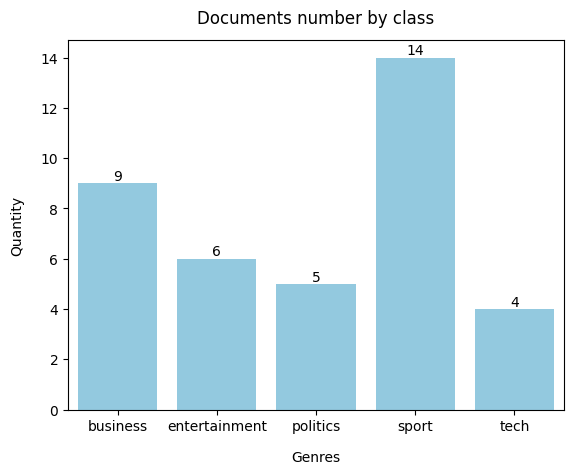

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

genres = df['genre'].unique()

def plot_doc_by_class(genres):
  ax = sns.countplot(x = 'genre', data = df , color='skyblue')
  ax.yaxis.grid(False)
  plt.title('Documents number by class', pad=12)
  plt.xlabel('Genres', labelpad=12)
  plt.ylabel('Quantity', labelpad=12)

  bars = ax.patches
  # Put numbers of docs above bars
  for bar in bars:
        height = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

  plt.show()


plot_doc_by_class(genres)

#Top 30 most frequent words

In [221]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

def get_genre_content(df, genre):
  content = df.loc[df['genre'] == genre, 'content'].str.cat(sep=' ')
  return content

def create_dict_content(df):
  dict_content = {}
  for genre in genres:
      dict_content[genre] = get_genre_content(df, genre)
      if 'all' in dict_content:
        dict_content['all'] += get_genre_content(df, genre)
      else:
          dict_content['all'] = get_genre_content(df, genre)
  return dict_content

def create_count_content(dict_content):
  count_content = {}
  for genre, content in dict_content.items():
      count_content[genre] = Counter(content.split())
  return count_content


def get_top_n_words(top_n, count_words):
    most_common_words = {}
    for word, count in count_words.most_common(top_n):
        most_common_words[word] = count
    return most_common_words


In [222]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_h_most_common_words(top_n, count_content, genre, title, fontsize):
    most_common = get_top_n_words(top_n, count_content[genre])
    most_common = sorted(most_common.items(), key=lambda x: x[1])
    words = [item[0] for item in most_common ]
    counts = [item[1] for item in most_common ]
    plt.figure(figsize=(11, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Quantity', labelpad=15)
    plt.ylabel('Tokens', labelpad=15)
    plt.grid(False)
    plt.title(title, pad=15)
    #Display number of token in front of each bar
    for i in range(len(words)):
      plt.text(counts[i], i, ' ' + str(counts[i]), ha='left', va='center')

dict_content = create_dict_content(df)
count_content = create_count_content(dict_content)

In [223]:
print(count_content)

{'business': Counter({'say': 34, 'rise': 14, 'export': 14, '1': 14, 'busi': 13, 'year': 13, 'could': 12, 'uk': 11, '2': 11, 'deficit': 11, 'would': 11, 'airlin': 11, 'mr': 11, 'club': 11, 'trade': 10, 'import': 10, 'fiat': 10, 'report': 10, 'offer': 10, 'high': 9, 'market': 9, 'share': 9, 'quarter': 9, 'also': 9, 'unit': 9, 'glazer': 9, 'novemb': 8, '2004': 8, 'fall': 8, 'hold': 8, 'make': 8, 'm': 8, 'price': 8, 'industri': 8, 'manchest': 8, 'board': 8, 'bid': 8, 'lse': 8, 'virgin': 8, 'blue': 8, '3': 7, 'month': 7, 'growth': 7, 'econom': 7, 'howev': 7, 'well': 7, 'stock': 7, 'loss': 7, 'propos': 7, 'may': 7, 'continu': 7, 'we': 7, 'exchang': 7, 'dollar': 7, 'rate': 7, '5': 6, 'nation': 6, 'good': 6, '5bn': 6, 'eu': 6, 'fuel': 6, 'ferrari': 6, 'maserati': 6, 'own': 6, 'amr': 6, 'profit': 6, 'big': 6, 'review': 6, 'foreign': 6, 'interest': 6, 'octob': 5, '9bn': 5, 'first': 5, 'see': 5, 'sector': 5, 'countri': 5, 'remain': 5, 'demand': 5, 'part': 5, 'financi': 5, 'euro': 5, 'one': 5, 'ba

##Top 30 most frequent tokens in business

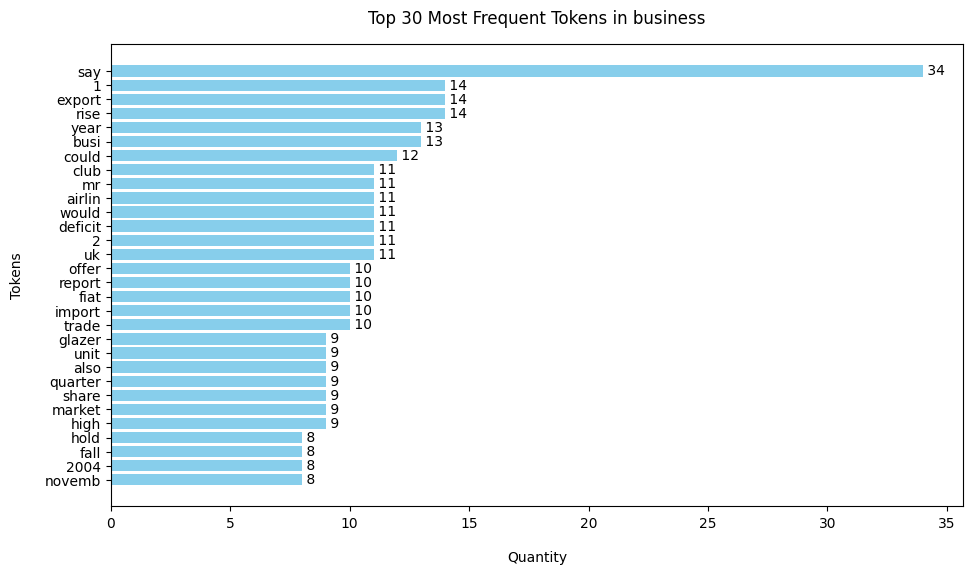

In [224]:
top_n = 30
fontsize = 12
title_business = 'Top {} Most Frequent Tokens in business'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'business', title_business, fontsize)
# common_words_business = get_top_n_words(top_n, count_content['business'])
# print(common_words_business)

##Top 30 most frequent tokens in entertainment




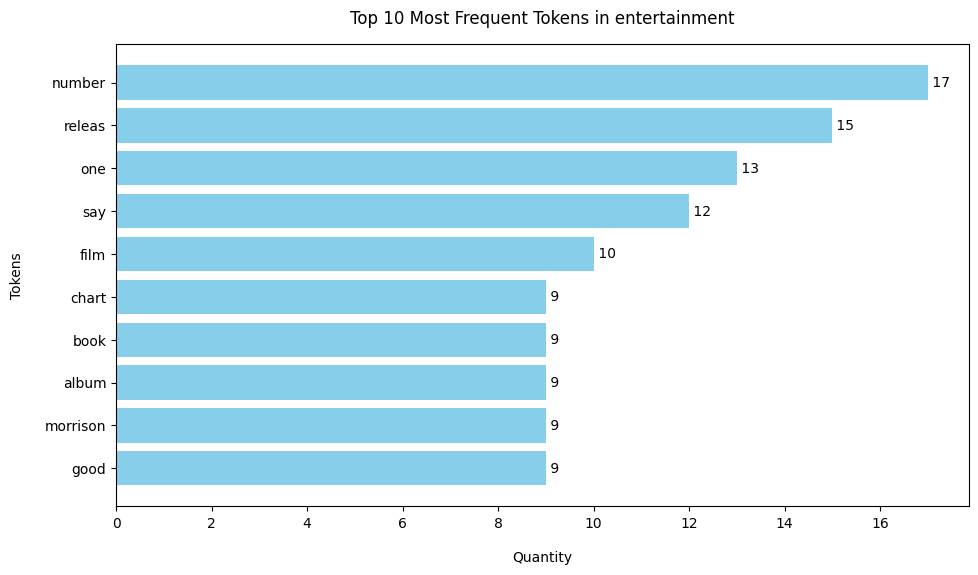

In [225]:
top_n = 10
fontsize = 12
title_entertainment = 'Top {} Most Frequent Tokens in entertainment'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'entertainment', title_entertainment, fontsize)
# common_words_entertainment = get_top_n_words(top_n, count_content['entertainment'])
# print(common_words_entertainment)

##Top 30 most frequent tokens in politics

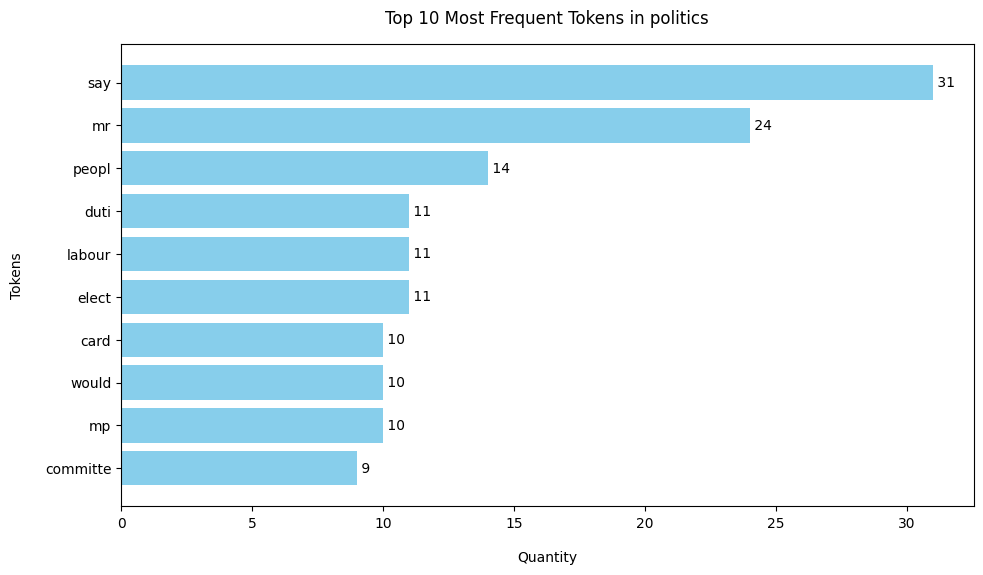

In [226]:
top_n = 10
fontsize = 12
title_politics = 'Top {} Most Frequent Tokens in politics'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'politics', title_politics, fontsize)
# common_words_politics = get_top_n_words(top_n, count_content['politics'])
# print(common_words_politics)

##Top 30 most frequent tokens in sport

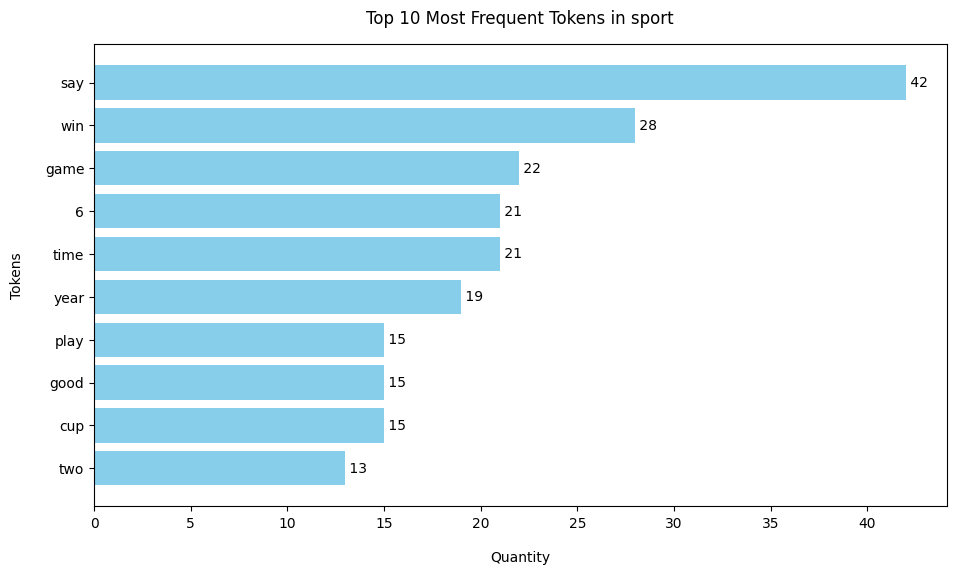

In [227]:
top_n = 10
fontsize = 12
title_sport = 'Top {} Most Frequent Tokens in sport'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'sport', title_sport, fontsize)
# common_words_sport = get_top_n_words(top_n, count_content['sport'])
# print(common_words_sport)

##Top 30 most frequent tokens in tech

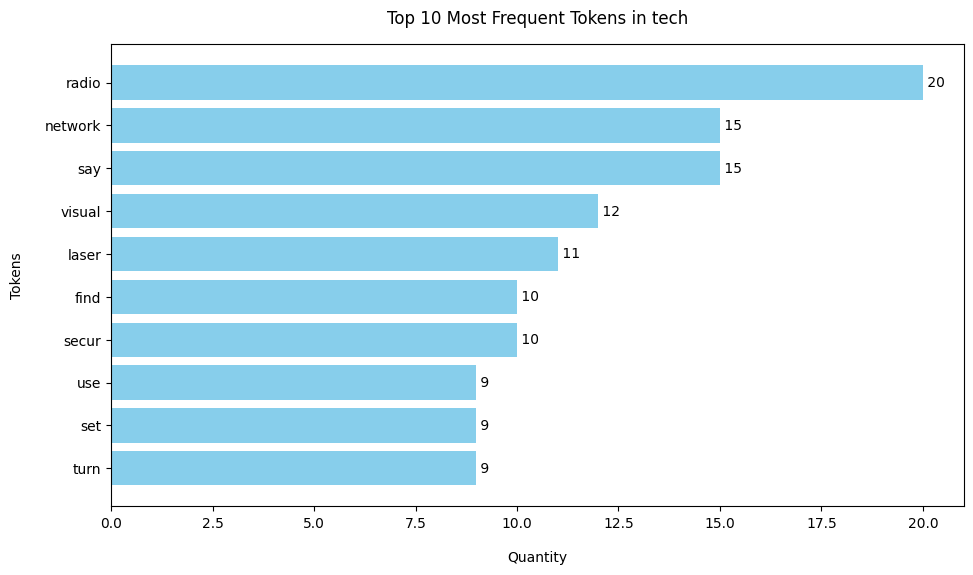

In [228]:
top_n = 10
fontsize = 12
title_tech = 'Top {} Most Frequent Tokens in tech'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'tech', title_tech, fontsize)
# common_words_tech = get_top_n_words(top_n, count_content['tech'])
# print(common_words_politics)

##Top 30 most frequent tokens in all dataset

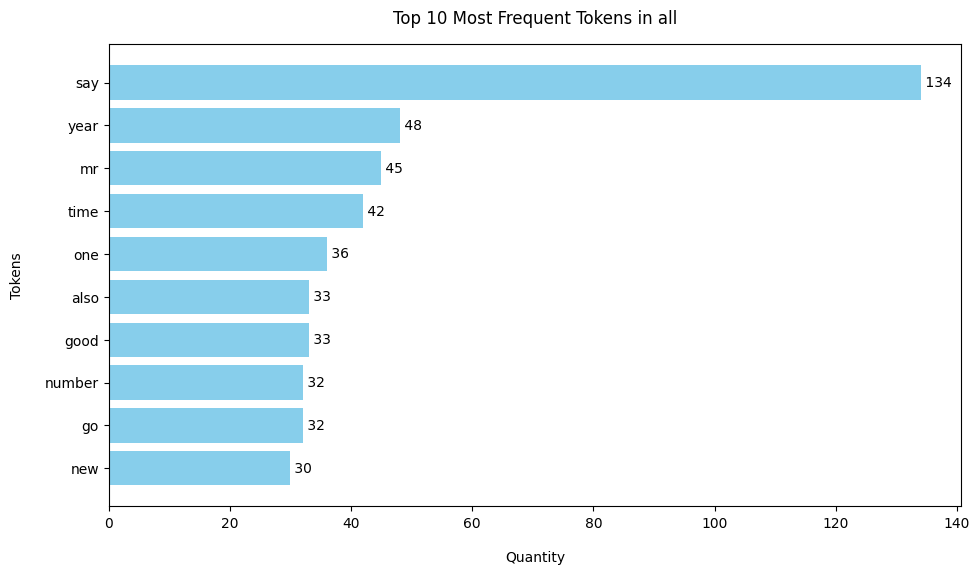

In [229]:
top_n = 10
fontsize = 12
title_all = 'Top {} Most Frequent Tokens in all'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'all', title_all, fontsize)
# common_words_all = get_top_n_words(top_n, count_content['all'])
# print(common_words_all)

#Frequency of class by word

In [230]:
import random

#Choose 10 random tokens in all content of news
random_words = random.sample(dict_content['all'].split(), 3)
print("random words: ", random_words)

def get_counts_by_genre(word, count_genres):
    counts_by_genre = {}  #Dictionary to store word count in each class
    for genre, content_counter in count_genres.items():
        if word in content_counter:
            counts_by_genre[genre] = content_counter[word]  # Adds the word count in the class to the dictionary
    return counts_by_genre


def get_frequency_class_by_word(selected_words, count_genres):
    dict_frequency = {}
    for word in selected_words:
        dict_frequency[word] = get_counts_by_genre(word, count_genres)
    return dict_frequency


dict_frequency = get_frequency_class_by_word(random_words, count_content)
print(dict_frequency)

random words:  ['back', 'step', 'handset']
{'back': {'business': 4, 'all': 19, 'politics': 3, 'sport': 12}, 'step': {'business': 2, 'all': 7, 'sport': 2, 'tech': 3}, 'handset': {'all': 7, 'tech': 7}}


In [231]:
#Testing
df[df['genre']=='politics']

,genre,filename,title,content
15,politics,1305.txt,Sayeed to stand down as Tory MP,tori mp jonathan saye stand ground ill health ...
16,politics,1248.txt,"Analysis: No pain, no gain?",call masoch strategi run iraq war toni blair s...
17,politics,1256.txt,Budget to set scene for election,gordon brown seek put economi centr labour bid...
18,politics,1109.txt,Custody death rate 'shocks' MPs,death custodi reach shock level committe mp pe...
19,politics,944.txt,Clarke to press on with ID cards,new home secretari charl clark vow plough plan...


# Frequency of words by documents

In [232]:
from collections import Counter

def get_frequency(df):
    frequency = {}
    for index, row in df.iterrows():
        filename = row['filename']
        word_counts = dict(Counter(row['content'].split()))
        if filename not in frequency:
          frequency[filename] = word_counts
    return frequency



frequency = get_frequency(df)
print(frequency)


{'440.txt': {'uk': 8, 'trade': 2, 'gap': 1, 'narrow': 1, 'novemb': 3, 'help': 1, '7': 2, '5': 4, 'rise': 6, 'export': 10, 'outsid': 1, 'european': 2, 'union': 2, 'accord': 1, 'offic': 2, 'nation': 2, 'statist': 2, 'differ': 1, 'import': 5, '3': 4, '1bn': 2, '8bn': 2, 'octob': 3, '6bn': 2, 'overal': 1, 'includ': 2, 'good': 4, 'servic': 2, '2': 5, '24': 1, 'although': 1, 'total': 1, 'new': 1, 'record': 1, '27': 1, '9bn': 4, 'deficit': 3, 'alon': 1, '4': 2, '5bn': 4, '16': 1, 'worth': 1, '21': 1, 'cumul': 1, 'first': 1, 'eleven': 1, 'month': 3, '2004': 1, 'stand': 1, '36': 1, '3bn': 1, 'high': 1, 'period': 1, '2003': 1, 'see': 2, 'improv': 2, 'level': 1, 'rest': 1, 'world': 1, 'on': 1, 'say': 3, 'eu': 6, 'fuel': 1, 'increas': 1, 'sale': 1, 'chemic': 2, 'non': 3, 'shoot': 1, 'growth': 2, 'across': 1, 'rang': 1, 'manufactur': 1, 'sector': 1, 'car': 1, 'consum': 1, 'durabl': 1, 'boost': 1, 'offset': 1, '1': 3, 'enter': 1, 'slow': 1, '0': 1, 'fall': 1, 'shortfal': 1, 'drop': 1, '7bn': 1, 'cou

In [233]:
df[df['filename']=='253.txt']

,genre,filename,title,content


# Word Index by documents





In [234]:
def create_word_index(df):
    h = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        words = content.split()
        for word in words:
            if word not in h:
                h[word] = {}

            if filename not in h[word]:
                h[word][filename] = 1
            else:
                h[word][filename] += 1
    return h

word_index = create_word_index(df)
print(word_index)

{'uk': {'440.txt': 8, '278.txt': 1, '239.txt': 2, '871.txt': 1, '535.txt': 3, '534.txt': 2, '743.txt': 1, '1256.txt': 1, '2128.txt': 1}, 'trade': {'440.txt': 2, '465.txt': 1, '439.txt': 5, '223.txt': 1, '278.txt': 1}, 'gap': {'440.txt': 1, '439.txt': 1}, 'narrow': {'440.txt': 1}, 'novemb': {'440.txt': 3, '439.txt': 3, '473.txt': 2, '1783.txt': 1, '1545.txt': 1}, 'help': {'440.txt': 1, '50.txt': 1, '535.txt': 1, '670.txt': 1, '1248.txt': 1, '1256.txt': 3, '944.txt': 1, '1782.txt': 2, '1846.txt': 3, '1919.txt': 1, '2169.txt': 1}, '7': {'440.txt': 2, '439.txt': 1, '871.txt': 1, '1819.txt': 2, '1786.txt': 2, '1782.txt': 4}, '5': {'440.txt': 4, '239.txt': 1, '473.txt': 1, '1248.txt': 1, '1256.txt': 1, '1470.txt': 1, '1819.txt': 1, '1786.txt': 1, '1782.txt': 1}, 'rise': {'440.txt': 6, '439.txt': 1, '239.txt': 6, '473.txt': 1, '535.txt': 2, '670.txt': 1, '1256.txt': 1}, 'export': {'440.txt': 10, '439.txt': 4}, 'outsid': {'440.txt': 1, '223.txt': 1}, 'european': {'440.txt': 2, '278.txt': 1, '5

In [235]:
df[df['filename']=='253.txt']

,genre,filename,title,content


# Seach

## Pre processing in seach query

In [236]:
query = 'russian movie'
query = pre_processing_aux(query)
print(query)

russian movi


## Search query

In [237]:
def get_frequency_query(query, word_index):
    query_index = {}
    for word in query.split():
        if word in word_index:
            query_index[word] = word_index[word]
    return query_index


index_query = get_frequency_query(query, word_index)
print(index_query)


def sum_occurrences(index_query):
    f = {}
    for word_dict in index_query.values():
        for filename, count in word_dict.items():
            if filename not in f:
                f[filename] = count
            else:
                f[filename] += count

    return f

occurrences = sum_occurrences(index_query)
print(occurrences)

{'russian': {'535.txt': 1, '1786.txt': 2}}
{'535.txt': 1, '1786.txt': 2}


In [238]:
def sort_sum_occurrences(occurrences):
  sorted_occurences = sorted(occurrences.items(), key=lambda x : x[1], reverse=True) #reverse is descr order
  return sorted_occurences


def get_top_n_docs(occurences, top_n):
  occurences = dict(occurences)
  docs = list(occurences.keys())[:top_n]
  return docs

sorted_occurences = sort_sum_occurrences(occurrences)
print(sorted_occurences)

top_n = 5
docs = get_top_n_docs(sorted_occurences, top_n)
print(docs)

[('1786.txt', 2), ('535.txt', 1)]
['1786.txt', '535.txt']


# Classifier

## Define test and training set

In [239]:
from sklearn.model_selection import train_test_split

def create_test_training_split(df, percent):
    train_dfs = []
    test_dfs = []
    grouped = df.groupby('genre')
    for genre, group_df in grouped:
        train_df, test_df = train_test_split(group_df, test_size=percent, random_state=42)
        train_dfs.append(train_df)
        test_dfs.append(test_df)

    train_df = pd.concat(train_dfs).reset_index(drop=True)
    test_df = pd.concat(test_dfs).reset_index(drop=True)
    return train_df, test_df
    # X_train = pd.concat(train_dfs).reset_index(drop=True).drop('genre')
    # y_train = pd.concat(train_dfs)['genre'].reset_index(drop=True)
    # X_test = pd.concat(test_dfs).reset_index(drop=True).drop('genre')
    # y_test = pd.concat(test_dfs)['genre'].reset_index(drop=True)
    # return X_train, y_train, X_test, y_test



percent_test = 0.2
train_df, test_df = create_test_training_split(df, percent_test)
# X_train, y_train, X_test, y_test = create_test_training_split(df, percent_test)

In [286]:
train_df.shape[0]

29

In [240]:
train_df, test_df = create_test_training_split(df, percent_test)

## Create dictionary for different words in training set

In [241]:
# def create_unique_words(content):
#   words = content.split()
#   #set function doesn't differentiate between uppercase/lowercase and accents,
#   #so it's necessary to preprocess first
#   return set(words)

# content_train = train_df['content'].str.cat(sep=' ')
# unique_words_set_train = create_unique_words(content_train)

# print(unique_words_set_train)
# print(len(unique_words_set_train))

def create_unique_words(content):
  words = content.split()
  dict_words = dict(Counter(words))
  return dict_words


content_train = train_df['content'].str.cat(sep=' ')
unique_words_set_train = create_unique_words(content_train)

print(unique_words_set_train)
print(len(unique_words_set_train))

{'manchest': 11, 'unit': 15, 'board': 8, 'agre': 4, 'give': 13, 'we': 14, 'tycoon': 2, 'malcolm': 1, 'glazer': 9, 'access': 4, 'book': 10, 'earli': 10, 'month': 13, 'mr': 33, 'present': 5, 'detail': 4, 'propos': 8, 'offer': 11, 'buy': 2, 'footbal': 10, 'club': 14, 'statement': 5, 'say': 105, 'would': 25, 'allow': 2, 'limit': 4, 'due': 6, 'dilig': 1, 'opportun': 9, 'take': 19, 'formal': 3, 'bid': 9, 'continu': 7, 'oppos': 4, 'plan': 13, 'call': 6, 'assumpt': 3, 'aggress': 2, 'damag': 3, 'mani': 8, 'support': 7, 'share': 9, 'fan': 6, 'base': 3, 'group': 6, 'sharehold': 5, 'strongli': 1, 'takeov': 4, '300': 1, 'protest': 3, 'outsid': 2, 'old': 11, 'trafford': 4, 'grind': 1, 'two': 22, 'day': 13, 'ago': 5, 'rival': 4, 'local': 2, 'citi': 2, 'plead': 1, 'visit': 5, 'insid': 3, 'ground': 5, 'team': 9, 'play': 16, 'televis': 5, 'match': 3, 'sunday': 4, 'respons': 3, 'come': 16, 'littl': 5, 'surpris': 3, 'make': 22, 'clear': 2, 'consid': 2, 'bona': 1, 'fide': 1, 'becom': 10, 'firm': 7, 'price'

## Tranform each doc in a vector

## Binary

In [ ]:
def create_binary_array_doc_aux(content, unique_words):
    tokens = content.split()
    binary_array = []
    for word in unique_words.keys():
        if word in tokens:
            binary_array.append(1)
        else:
            binary_array.append(0)
    return binary_array


def create_binary_array_doc(df, unique_words):
    binary_words = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        binary_array = create_binary_array_doc_aux(content, unique_words)
        binary_words[filename] = binary_array

    return binary_words


binary_word_dict = create_binary_array_doc(train_df, unique_words_set_train)
binary_word_dict

In [302]:
#################### Testing ###########################
def count_ones(vector):
  count = 0
  for element in vector:
    if element == 1:
      count += 1
  return count

num = '223.txt'

#print binray dict of 216.txt file
print(f"Binary array of {num} file: {binary_word_dict[num]}")

# print len of binary_word_dict and unique_words_set_train. The size should be the same
print(f"Size of binary_word_vector of file {num} : {len(binary_word_dict[num])}")
print(f"Size of unique_words_set_train : {len(unique_words_set_train)}")

content_file = train_df[train_df['filename'] == num]['content'].values[0]
# content_377
unique_words_file = create_unique_words(content_file)
# print(unique_words_file)
print(f"Size of unique_words of file: {len(unique_words_file)}")

# The qtd of ones should be the same of unique_words file
num_ones = count_ones(binary_word_dict[num])
print(f"Number of ones in the vector: {num_ones}")

print(f"len of binary_word_dict: {len(binary_word_dict)}")

Binary array of 223.txt file: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Frequency of word in docs

In [304]:
# frequency_word_docs

def create_word_frequency_aux(content, unique_words):
    word_frequency = [0] * len(unique_words)
    tokens = content.split()
    for index, word in enumerate(unique_words):
        if word in tokens:
            word_frequency[index] = tokens.count(word)

    return word_frequency


def create_word_frequency(df, unique_words):
  word_frequency_dict = {}
  for index, row in df.iterrows():
      filename = row['filename']
      content = row['content']
      # word_frequency_dict = create_word_frequency_aux(content, unique_words)
      word_frequency_dict[filename] = create_word_frequency_aux(content, unique_words)

  return word_frequency_dict

In [305]:
## Testing
word_frequency_file = create_word_frequency_aux(content_file, unique_words_set_train)
print(f"word_frequency_file: {word_frequency_file}")
print(f"unique_words_set_train {unique_words_set_train}")
print("\n")
content_file

word_frequency_file: [8, 8, 6, 1, 2, 2, 2, 1, 9, 1, 1, 2, 1, 8, 2, 1, 5, 5, 1, 5, 11, 3, 6, 2, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1, 4, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

'manchest unit board agre give we tycoon malcolm glazer access book earli month mr glazer present board detail propos offer buy footbal club statement club say would allow mr glazer limit due dilig give opportun take propos formal bid say continu oppos mr glazer plan call assumpt aggress plan damag mani manchest unit support share club fan base group sharehold unit strongli oppos takeov mr glazer 300 fan protest outsid old trafford grind two day ago rival local club manchest citi plead visit fan protest insid ground two team play televis match sunday manchest unit respons come littl surpris board make clear board respons consid bona fide offer propos club say statement becom firm offer price board like regard fair term may deliver also stress stay oppos mr glazer propos board continu believ mr glazer busi plan assumpt aggress statement say direct indirect financi strain busi could damag whether bid attract monetari term case manchest unit mani investor hold stock sentiment rather finan

In [309]:
word_frequency_dict = create_word_frequency(train_df, unique_words_set_train)
print(f"len of word_frequency_file {len(word_frequency_file)}")
print(f"unique_words in file: {create_unique_words(content_file)}")
print(f"len of unique words in file {(len(create_unique_words(content_file)))}")

len of word_frequency_file 2090
unique_words in file: {'manchest': 8, 'unit': 8, 'board': 6, 'agre': 1, 'give': 2, 'we': 2, 'tycoon': 2, 'malcolm': 1, 'glazer': 9, 'access': 1, 'book': 1, 'earli': 2, 'month': 1, 'mr': 8, 'present': 2, 'detail': 1, 'propos': 5, 'offer': 5, 'buy': 1, 'footbal': 5, 'club': 11, 'statement': 3, 'say': 6, 'would': 2, 'allow': 1, 'limit': 1, 'due': 1, 'dilig': 1, 'opportun': 1, 'take': 2, 'formal': 2, 'bid': 3, 'continu': 2, 'oppos': 3, 'plan': 3, 'call': 2, 'assumpt': 2, 'aggress': 2, 'damag': 2, 'mani': 2, 'support': 3, 'share': 3, 'fan': 3, 'base': 2, 'group': 2, 'sharehold': 3, 'strongli': 1, 'takeov': 4, '300': 1, 'protest': 2, 'outsid': 1, 'old': 2, 'trafford': 2, 'grind': 1, 'two': 2, 'day': 2, 'ago': 1, 'rival': 1, 'local': 1, 'citi': 1, 'plead': 1, 'visit': 1, 'insid': 1, 'ground': 4, 'team': 2, 'play': 1, 'televis': 1, 'match': 1, 'sunday': 1, 'respons': 2, 'come': 1, 'littl': 1, 'surpris': 1, 'make': 3, 'clear': 1, 'consid': 1, 'bona': 1, 'fide': 1

## TF-IDF

In [311]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_tfidf_aux(content, tfidf_vectorizer):
    tfidf_vectorizer.fit(content)
    tfidf_array = tfidf_vectorizer.transform(content).toarray()
    return tfidf_array

def create_tfidf(df, unique_words):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = []

    for index, row in df.iterrows():
        content = row['content']
        tfidf_array = create_tfidf_aux([content], tfidf_vectorizer)
        tfidf_matrix.append(tfidf_array[0])
    return tfidf_matrix



tf_idf_train = create_tfidf(train_df, unique_words_set_train)
tf_idf_train
print(len(tf_idf_train[0]))

# train_docs = train_df['content']
# test_docs = test_df['content']

190


In [312]:
train_df.head()

,genre,filename,title,content
0,business,223.txt,Man Utd to open books to Glazer,manchest unit board agre give we tycoon malcol...
1,business,440.txt,Trade gap narrows as exports rise,uk trade gap narrow novemb help 7 5 rise expor...
2,business,473.txt,Virgin Blue shares plummet 20%,share australian budget airlin virgin blue plu...
3,business,465.txt,High fuel costs hit US airlines,two larg airlin us american southwest blame re...
4,business,439.txt,US trade deficit widens sharply,gap we export import widen 60bn 31 7bn time re...
